# this model is based on a publication made by 

chris yakopcic
tarek m taha
guru subramanyam 
robinson e pino
stanley rogers

# titled:
## A Memristor Device Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scs
import math

In [3]:

def dx(alp,aln,ap,an,xp,xn,vp,vn,x,v,dt):
    def fx(alp,aln,xp,xn,x,v):
        def wp(x,xp):
            dum = ((xp-x)/(1-xp))+1
            return dum
        def wn(x,xn):
            dum = x/(1-xn)
            return dum

        if v>0:
            if x >= xp:
                dum=np.exp(-alp*(x-xp))*wp(x,xp)
            if x < xp:
                dum=1
        else:
            if x <= (1-xn):
                dum=np.exp(aln*(x+xn-1))*wn(x,xn)
            if x > (1-xn):
                dum=1
        return dum
    
    def gv(ap,an,vp,vn,v):
        if v>vp:
            dum=ap*(np.exp(v)-np.exp(vp))
        if v<-vn:
            dum=-an*(np.exp(-v)-np.exp(vn))
        if -vn<=v<=vp:
            dum=0
        return dum
    
    return(gv(ap,an,vp,vn,v)*fx(alp,aln,xp,xn,x,v)*dt)


def current(a1,a2,b,x,v):
    if v >=0:
        dum=a1*x*math.sinh(b*v)
    if v < 0:
        dum=a2*x*math.sinh(b*v)
    return dum

In [16]:
time=np.linspace(0,10,1000)
f=1
volts=np.sin(2*np.pi*time*f)
vp=1.5
vn=0.5
ap=0.005
an=0.08
xp=0.2
xn=0.5
alp=1.2
aln=3
a1=3.7e-7
a2=4.35e-7
b=0.7
x=0.99

In [17]:
cur=[]
xpos=[]
for i in range(len(volts)):
    if i==0:
        cur.append(current(a1,a2,b,x,volts[i]))
        xpos.append(x)
    else:
        dt=time[i]-time[i-1]
        change=dx(alp,aln,ap,an,xp,xn,vp,vn,x,volts[i],dt)
        x=x+change
        cur.append(current(a1,a2,b,x,volts[i]))
        xpos.append(x)

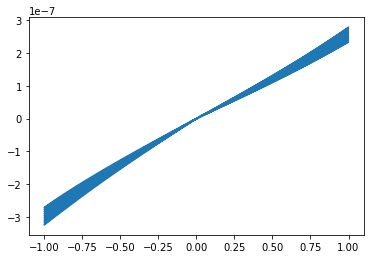

In [18]:
plt.plot(volts,cur)

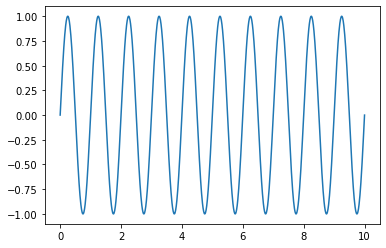

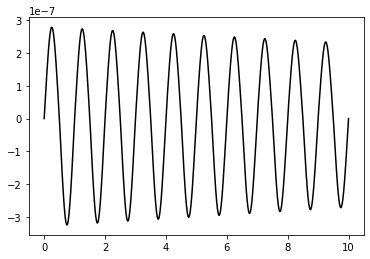

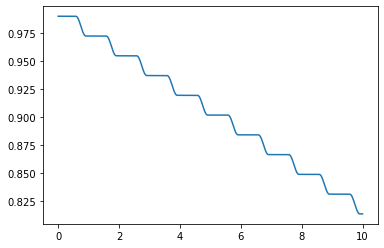

In [20]:
plt.plot(time,volts)
plt.show()
plt.plot(time,cur,color='black')
plt.show()
plt.plot(time,xpos)
plt.show()
#plt.plot(time,(volts/cur))

In [15]:
res=[]
for i in range(len(volts)):
    res.append(volts[i]/cur[i])

<ipython-input-15-5abe96ea4cda>:3: RuntimeWarning: invalid value encountered in double_scalars
  res.append(volts[i]/cur[i])


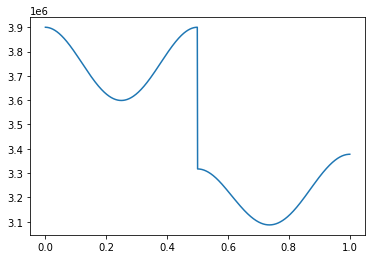

In [13]:
plt.plot(time,res)